In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import plotly.express as px
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
iris = pd.read_csv("IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

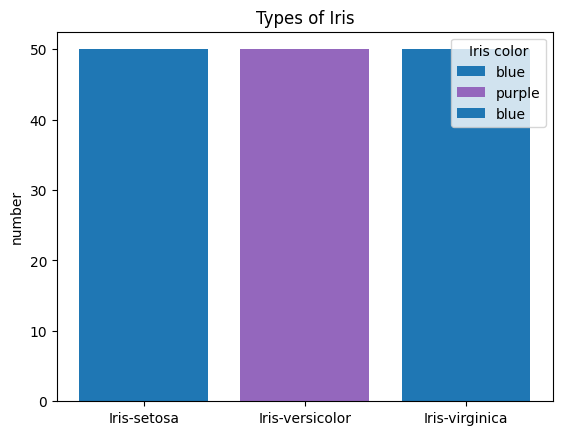

In [6]:
fig, axes = plt.subplots()

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
counts = [50, 50, 50]
bar_labels = ['blue', 'purple', 'blue']
bar_colors = ['tab:blue', 'tab:purple', 'tab:blue']
axes.bar(species, counts, label=bar_labels, color=bar_colors)

axes.set_ylabel('number')
axes.set_title('Types of Iris')
axes.legend(title='Iris color')

plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
iris['species']= le.fit_transform(iris['species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
def df_to_plotly(iris):
    return{'z': iris.values.tolist(),
           'x': iris.columns.tolist(),
           'y': iris.index.tolist() }
irisNew = iris.corr()
fig = go.Figure(data = go.Heatmap(df_to_plotly(irisNew)))
iris.corr(numeric_only = True)
fig.show()

In [9]:
fig1 = px.scatter(iris, x='species', y='petal_width')
fig1.update_traces(marker_color='black', marker_line_color='rgb(8,41,107)',
                  marker_line_width=1.5)
fig1.update_layout(title_text='Species and Petal Width')
fig1.show()

In [10]:
fig2 = px.scatter(iris, x='species', y='petal_length')
fig2.update_traces(marker_color='turquoise', marker_line_color='rgb(8,48,102)',
                  marker_line_width=1.5)
fig2.update_layout(title_text='Species and Petal Length')
fig2.show()

### Relationship between petal length and petal width using scatter plot 

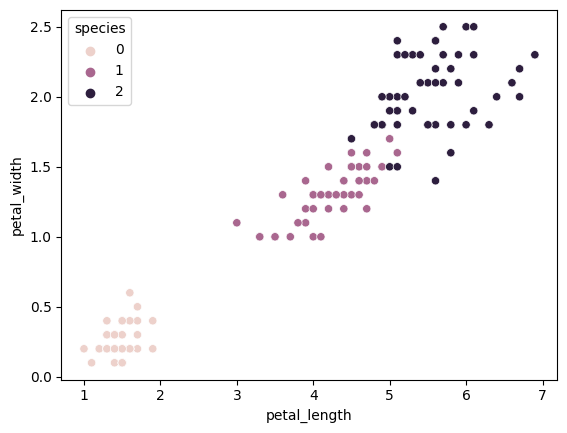

In [11]:
sns.scatterplot(x="petal_length",
                y="petal_width",
                data=iris,
                hue="species")
plt.show()

In [12]:
fig3 = px.scatter(iris, x='species', y='sepal_length')
fig3.update_traces(marker_color='red', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig3.update_layout(title_text='Species and Sepal Length')
fig3.show()

In [13]:
fig4 = px.scatter(iris, x='species', y='sepal_width')
fig4.update_traces(marker_color='green', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig4.update_layout(title_text='Species and Sepal Width')
fig4.show()

### Relationship between sepal length and sepal width using scatter plot 

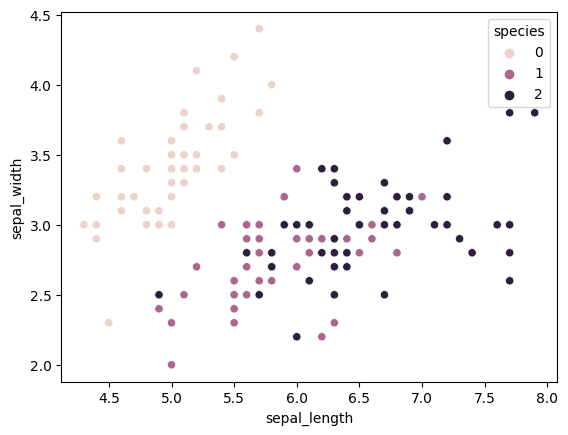

In [14]:
sns.scatterplot(x="sepal_length",
                y="sepal_width",
                data=iris,hue="species")
plt.show()

### Splitting

In [15]:
y = iris["species"]
X = iris.drop('species', axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [19]:
logreg = LogisticRegression()

In [20]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
prediction = logreg.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [22]:
accuracy_score(y_test, prediction) * 100

100.0